# Smart Health APP

## Data Source: BRFSS

*The Behavioral Risk Factor Surveillance System (BRFSS) is the nation's premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.*
----From [BRFSS](http://www.cdc.gov/brfss/about/index.htm)

In [13]:
import urllib
import zipfile
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

url = 'https://www.cdc.gov/brfss/annual_data/'

for year in range(2015, 2016):
    filename = "%d/files/LLCP%dXPT.zip" %(year, year)
    urllib.urlretrieve(url + filename, filename[15:]) 
    zip = zipfile.ZipFile(filename[15:])
    zip.extractall()
        
#https://www.cdc.gov/brfss/annual_data/2015/files/LLCP2015XPT.zip

In [12]:
data15 = pd.read_sas("LLCP2015.XPT ", format='xport')

In [129]:
feature = ['GENHLTH','_RFHLTH', 'PHYSHLTH', 'MENTHLTH', 'HLTHPLN1', 'MEDCOST', 
           'BPHIGH4', 'TOLDHI2', 'ASTHMA3', 'HAVARTH3', 'ADDEPEV2', 'DIABETE3', 
           '_STATE', 'SEX', 'MARITAL', 'EDUCA', 'CHILDREN', '_AGE_G', '_BMI5', '_BMI5CAT', 
           '_RFSMOK3' ,'_SMOKER3', '_DRNKWEK', '_RFDRHV5', '_FRUTSUM', '_VEGESUM', '_PACAT1', '_PASTRNG', '_PAREC1']
rfdata15 = data15[feature]
del data15

In [60]:
by_age = rfdata15.pivot_table('GENHLTH', aggfunc='count', index='_AGE_G', columns='_RFHLTH')
by_age = by_age.div(by_age.sum(axis = 1), axis = 0)

by_gender = rfdata15.pivot_table('GENHLTH', aggfunc='count', index='SEX', columns='_RFHLTH')
by_gender = by_gender.div(by_gender.sum(axis = 1), axis = 0)

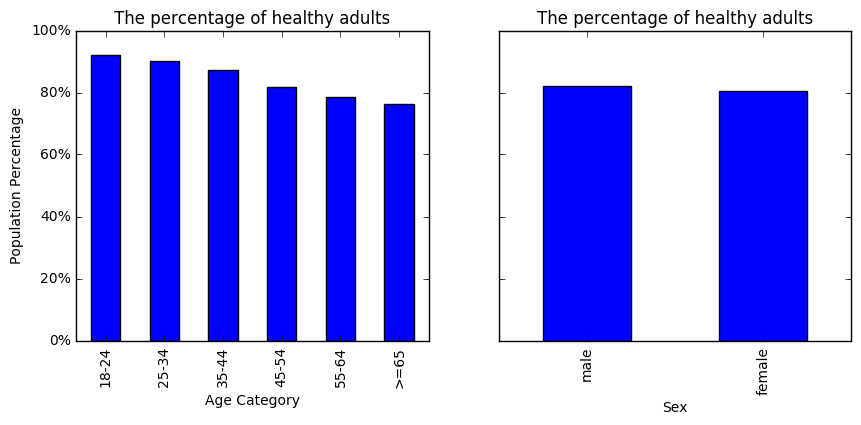

In [259]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
by_age[1.0].plot(ax=ax[0], kind='bar',title = 'The percentage of healthy adults')
by_gender[1.0].plot(ax=ax[1], kind='bar', title = 'The percentage of healthy adults')
ax[0].set_ylabel('Population Percentage')
ax[0].set_xlabel('Age Category')
ax[0].set_xticklabels(['18-24', '25-34', '35-44', '45-54', '55-64', '>=65'])
ax[1].set_xlabel('Sex')
ax[1].set_xticklabels(['male', 'female'])
ax[0].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[0].get_yticks()]) 

In [54]:
by_state = rfdata15.pivot_table('GENHLTH', aggfunc='count', index='_STATE', columns='_RFHLTH')
by_state = by_state.div(by_state.sum(axis = 1), axis = 0)
by_state = by_state.sort_values(by = 1.0)
by_state.iloc[0:5]

_RFHLTH,1.0,2.0,9.0
_STATE,,,
72.0,0.589639,0.408696,0.001665
5.0,0.705099,0.291476,0.003425
28.0,0.714664,0.281856,0.003480
54.0,0.729226,0.267920,0.002854
21.0,0.737111,0.260845,0.002044


Five most unhealthy states: Puerto Rico, Arkansas, Mississippi, West Virginia, Kentucky

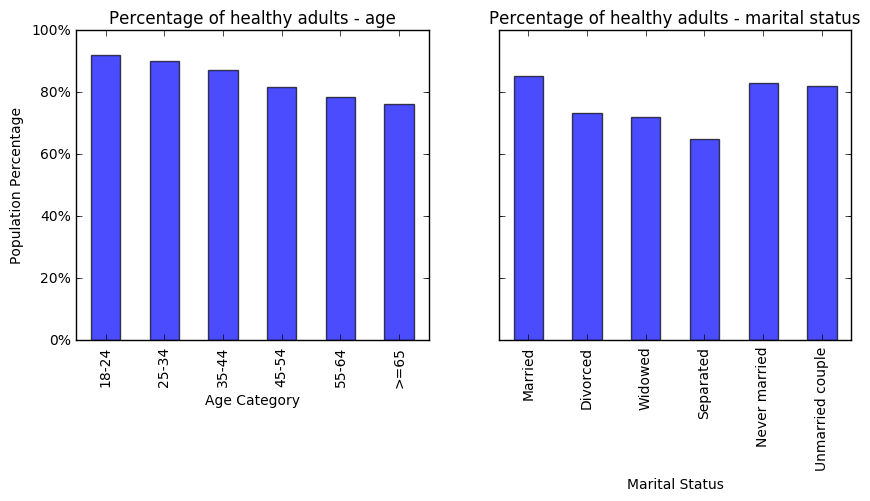

In [224]:
by_marital = rfdata15.pivot_table('GENHLTH', aggfunc='count', index='MARITAL', columns='_RFHLTH')
by_marital = by_marital.div(by_marital.sum(axis = 1), axis = 0)

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

by_age[1.0].plot(ax=ax[0], kind='bar',title = 'Percentage of healthy adults - age',alpha=0.7)
ax[0].set_ylabel('Population Percentage')
ax[0].set_xlabel('Age Category')
ax[0].set_xticklabels(['18-24', '25-34', '35-44', '45-54', '55-64', '>=65'])

by_marital.iloc[0:-1][1].plot(ax = ax[1], kind='bar', title='Percentage of healthy adults - marital status',alpha=0.7)
ax[1].set_xlabel('Marital Status')
ax[1].set_xticklabels(['Married', 'Divorced', 'Widowed', 'Separated', 'Never married', 'Unmarried couple'])
ax[0].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[0].get_yticks()]) 

In [142]:
marital_all = rfdata15[['MARITAL', 'PHYSHLTH', 'MENTHLTH', '_RFHLTH',
                       '_RFSMOK3', '_RFDRHV5', '_FRUTSUM', '_VEGESUM', '_PAREC1']]
marital_all = marital_all.dropna(how='any')
marital_all = marital_all[(marital_all.PHYSHLTH != 77) & (marital_all.PHYSHLTH != 99)]
marital_all = marital_all[(marital_all.MENTHLTH != 77) & (marital_all.MENTHLTH != 99)]
marital_all['PHYSHLTH'][marital_all.PHYSHLTH==88] = 0
marital_all['MENTHLTH'][marital_all.MENTHLTH==88] = 0

marital_bad = marital_all[(marital_all.MARITAL >=2) & (marital_all.MARITAL <=4)]
marital_good = marital_all[(marital_all.MARITAL <2) | (marital_all.MARITAL >4)]

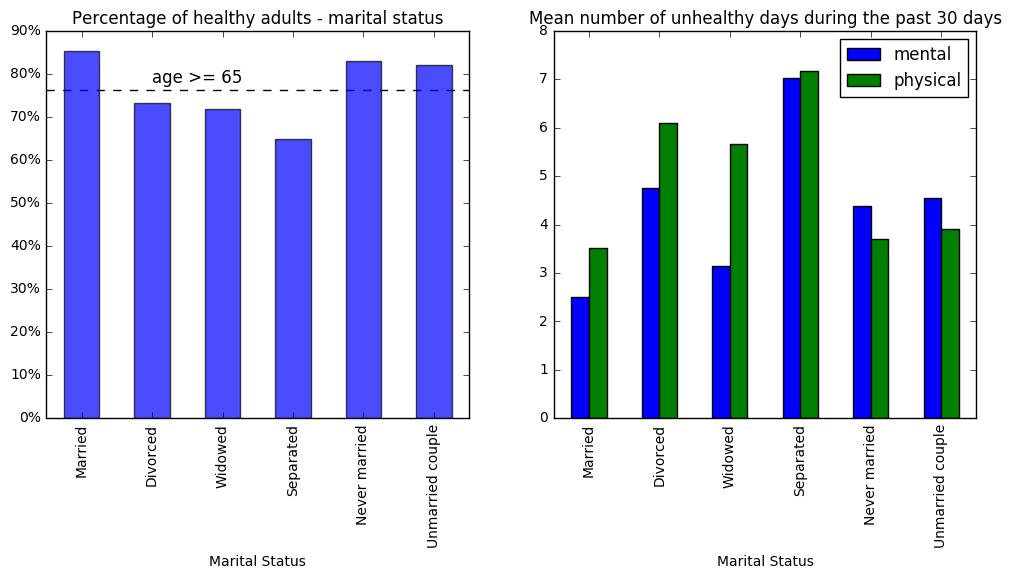

In [257]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

by_marital.iloc[0:-1][1].plot(ax = ax[0], kind='bar', title='Percentage of healthy adults - marital status',alpha=0.7)
ax[0].set_xlabel('Marital Status')
ax[0].set_xticklabels(['Married', 'Divorced', 'Widowed', 'Separated', 'Never married', 'Unmarried couple'])
ax[0].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[0].get_yticks()]) 

y0=by_age.iloc[5][1.0] #the percentage of healthy adults in population with age >= 65
ax[0].axhline(y=y0,xmin=0,xmax=10,c="black",linewidth=1,linestyle='--',zorder=0)
ax[0].text(1, 0.78, 'age >= 65', fontsize=12)

marital_all_pm = marital_all.pivot_table(['PHYSHLTH', 'MENTHLTH'], aggfunc='mean', index='MARITAL')

marital_all_pm.iloc[:-1].plot(ax=ax[1],kind='bar', title="Mean number of unhealthy days during the past 30 days")
ax[1].set_xticklabels(['Married', 'Divorced', 'Widowed', 'Separated', 'Never married', 'Unmarried couple'])
ax[1].legend(['mental','physical'])
ax[1].set_xlabel('Marital Status')

In [254]:
def calculate_statistics(table, status):
    result = pd.DataFrame({'marital status' : status,
                          'current smoker fraction' : 1.0*len(table[table._RFSMOK3==2])/len(table), 
                          'heavy drinker fraction': 1.0*len(table[table._RFDRHV5==2])/len(table), 
                          'insufficient exercise fraction' : 1.0*len(table[table._PAREC1==4])/len(table),
                          'average fruit consumption' : np.mean(table['_FRUTSUM'])/100,
                          'average vegetable comsumption' : np.mean(table['_VEGESUM'])/100}, index=[0])
    return result

good_percent = calculate_statistics(marital_good, 'good')
bad_percent = calculate_statistics(marital_bad, 'bad')

marital_stat = good_percent.append(bad_percent,ignore_index=True)

In [255]:
marital_stat

,average fruit consumption,average vegetable comsumption,current smoker fraction,heavy drinker fraction,insufficient exercise fraction,marital status
0,1.365156,1.995555,0.125058,0.054290,0.349667,good
1,1.350759,1.848774,0.189462,0.051692,0.406852,bad


In [256]:
marital_stat = marital_stat.transpose()
print(marital_stat.index)
marital_stat.index = [range(6)]
marital_stat

Index([u'average fruit consumption', u'average vegetable comsumption',
       u'current smoker fraction', u'heavy drinker fraction',
       u'insufficient exercise fraction', u'marital status'],
      dtype='object')


,0,1
0,1.36516,1.35076
1,1.99555,1.84877
2,0.125058,0.189462
3,0.0542904,0.0516922
4,0.349667,0.406852
5,good,bad


(0, 2.2)

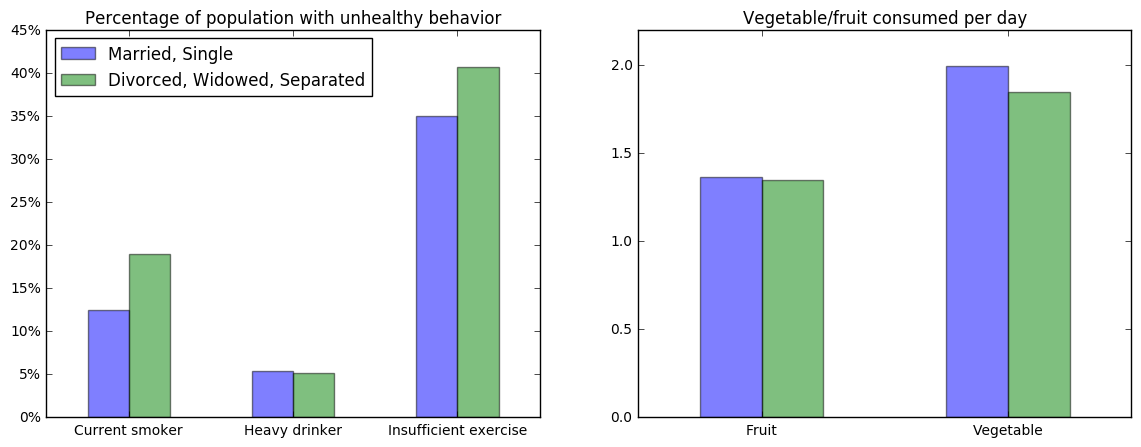

In [258]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

marital_stat.iloc[2:5].plot(ax=ax[0], kind='bar', title='Percentage of population with unhealthy behavior',alpha=0.5)
ax[0].set_xticklabels(['Current smoker', 'Heavy drinker', 'Insufficient exercise'], rotation='horizontal')
ax[0].legend(['Married, Single','Divorced, Widowed, Separated'], loc = 2)
ax[0].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[0].get_yticks()]) 

marital_stat.iloc[0:2].plot(ax=ax[1], kind='bar', title='Vegetable/fruit consumed per day',alpha=0.5)
ax[1].set_xticklabels(['Fruit', 'Vegetable'], rotation='horizontal')
ax[1].legend_.remove()
ax[1].set_ylim([0, 2.2])